Links to official tutorials:
1. https://github.com/CornellNLP/Cornell-Conversational-Analysis-Toolkit/blob/master/examples/Introduction_to_ConvoKit.ipynb
2. https://github.com/CornellNLP/Cornell-Conversational-Analysis-Toolkit/blob/master/examples/vectors/vector_demo.ipynb
3. https://github.com/CornellNLP/Cornell-Conversational-Analysis-Toolkit/blob/master/examples/text-processing/text_preprocessing_demo.ipynb
4.https://github.com/CornellNLP/Cornell-Conversational-Analysis-Toolkit/blob/master/convokit/tests/notebook_testers/test_corpus_partial_load.ipynb
5. https://github.com/CornellNLP/Cornell-Conversational-Analysis-Toolkit/blob/master/examples/merging/corpus_merge_demo.ipynb
6. Use the movie dialo corpus: https://github.com/CornellNLP/Cornell-Conversational-Analysis-Toolkit/blob/master/examples/sigdial-demo.ipynb

issue: the first utterance of a conversation.

In [144]:
import spacy
from convokit import Corpus, download
import numpy as np
import networkx as nx
from node2vec import Node2Vec
from tqdm import tqdm
import pandas as pd

In [4]:
nlp = spacy.load('en_core_web_sm')

In [5]:
def tokenizer_spacy(text):
    doc = nlp(text)
    article = []
    for w in doc:
        # if it's not a stop word or punctuation mark, add it to our article!
        if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num:
            # we add the lematized version of the word
            article.append(w.lemma_)
    return article

### Just play around

In [6]:
corpus = Corpus(filename=download("movie-corpus"))
corpus.print_summary_stats()

Number of Speakers: 9035
Number of Utterances: 304713
Number of Conversations: 83097


In [28]:
corpus.random_speaker()

Speaker({'obj_type': 'speaker', 'meta': {'character_name': 'MOTLEY', 'movie_idx': 'm101', 'movie_name': 'the insider', 'gender': '?', 'credit_pos': '?'}, 'vectors': [], 'owner': <convokit.model.corpus.Corpus object at 0x7f8a8aad1640>, 'id': 'u1503'})

In [18]:
corpus.random_conversation()

Conversation({'obj_type': 'conversation', 'meta': {'movie_idx': 'm229', 'movie_name': 'wild at heart', 'release_year': '1990', 'rating': '7.20', 'votes': '29388', 'genre': "['crime', 'romance', 'thriller']"}, 'vectors': [], 'tree': None, 'owner': <convokit.model.corpus.Corpus object at 0x7f8a8aad1640>, 'id': 'L653415'})

In [25]:
corpus.get_attribute_table(obj_type='conversation', attrs=[])

""
id
L1044
L984
L924
L870
L866
...
L666324
L666262
L666520


In [26]:
corpus.get_utterance('L1044')

Utterance({'obj_type': 'utterance', 'meta': {'movie_id': 'm0', 'parsed': [{'rt': 1, 'toks': [{'tok': 'They', 'tag': 'PRP', 'dep': 'nsubj', 'up': 1, 'dn': []}, {'tok': 'do', 'tag': 'VBP', 'dep': 'ROOT', 'dn': [0, 2, 3]}, {'tok': 'to', 'tag': 'TO', 'dep': 'dobj', 'up': 1, 'dn': []}, {'tok': '!', 'tag': '.', 'dep': 'punct', 'up': 1, 'dn': []}]}]}, 'vectors': [], 'speaker': Speaker({'obj_type': 'speaker', 'meta': {'character_name': 'CAMERON', 'movie_idx': 'm0', 'movie_name': '10 things i hate about you', 'gender': 'm', 'credit_pos': '3'}, 'vectors': [], 'owner': <convokit.model.corpus.Corpus object at 0x7f8a8aad1640>, 'id': 'u2'}), 'conversation_id': 'L1044', 'reply_to': None, 'timestamp': None, 'text': 'They do to!', 'owner': <convokit.model.corpus.Corpus object at 0x7f8a8aad1640>, 'id': 'L1044'})

In [59]:
corpus.get_utterance('L1045')

Utterance({'obj_type': 'utterance', 'meta': {'movie_id': 'm0', 'parsed': [{'rt': 1, 'toks': [{'tok': 'They', 'tag': 'PRP', 'dep': 'nsubj', 'up': 1, 'dn': []}, {'tok': 'do', 'tag': 'VBP', 'dep': 'ROOT', 'dn': [0, 2, 3]}, {'tok': 'not', 'tag': 'RB', 'dep': 'neg', 'up': 1, 'dn': []}, {'tok': '!', 'tag': '.', 'dep': 'punct', 'up': 1, 'dn': []}]}]}, 'vectors': [], 'speaker': Speaker({'obj_type': 'speaker', 'meta': {'character_name': 'BIANCA', 'movie_idx': 'm0', 'movie_name': '10 things i hate about you', 'gender': 'f', 'credit_pos': '4'}, 'vectors': [], 'owner': <convokit.model.corpus.Corpus object at 0x7f8a8aad1640>, 'id': 'u0'}), 'conversation_id': 'L1044', 'reply_to': 'L1044', 'timestamp': None, 'text': 'They do not!', 'owner': <convokit.model.corpus.Corpus object at 0x7f8a8aad1640>, 'id': 'L1045'})

In [57]:
corpus.get_speaker_ids()[:10]

['u0', 'u2', 'u3', 'u4', 'u5', 'u11', 'u1', 'u9', 'u7', 'u6']

In [62]:
conv = corpus.get_conversation('L1044')
for utt in conv.iter_utterances():
    print(utt.id)

L1045
L1044


In [67]:
corpus.get_speakers_dataframe().head()

,vectors,meta.character_name,meta.movie_idx,meta.movie_name,meta.gender,meta.credit_pos
id,,,,,,
u0,[],BIANCA,m0,10 things i hate about you,f,4
u2,[],CAMERON,m0,10 things i hate about you,m,3
u3,[],CHASTITY,m0,10 things i hate about you,?,?
u4,[],JOEY,m0,10 things i hate about you,m,6
u5,[],KAT,m0,10 things i hate about you,f,2


In [68]:
corpus.get_utterances_dataframe().head()

,timestamp,text,speaker,reply_to,conversation_id,meta.movie_id,meta.parsed,vectors
id,,,,,,,,
L1045,None,They do not!,u0,L1044,L1044,m0,"[{'rt': 1, 'toks': [{'tok': 'They', 'tag': 'PR...",[]
L1044,None,They do to!,u2,None,L1044,m0,"[{'rt': 1, 'toks': [{'tok': 'They', 'tag': 'PR...",[]
L985,None,I hope so.,u0,L984,L984,m0,"[{'rt': 1, 'toks': [{'tok': 'I', 'tag': 'PRP',...",[]
L984,None,She okay?,u2,None,L984,m0,"[{'rt': 1, 'toks': [{'tok': 'She', 'tag': 'PRP...",[]
L925,None,Let's go.,u0,L924,L924,m0,"[{'rt': 0, 'toks': [{'tok': 'Let', 'tag': 'VB'...",[]


In [69]:
corpus.get_conversations_dataframe().head()

,vectors,meta.movie_idx,meta.movie_name,meta.release_year,meta.rating,meta.votes,meta.genre
id,,,,,,,
L1044,[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"
L984,[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"
L924,[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"
L870,[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"
L866,[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"


In [91]:
corpus.get_utterance('L506573')
# the lines ids are not sequential. Some are skipped. 

KeyError: 'L506573'

### Preparations and Constructing networks

Using number of lines to construct networks.
We may use other ways to construct egdes in the future. 

In [100]:
def get_movie_utt_dic(corpus):
    '''
    get the dictionary of movies that map movies to corresponding utterances. 
    In chronological order. 
    '''
    movie_utt_dic = {}
    movie_idx_name = {}
    for utt in tqdm(corpus.iter_utterances()):
        if utt.meta['movie_id'] not in movie_utt_dic:
            movie_utt_dic[utt.meta['movie_id']] = []
            movie_idx_name[utt.meta['movie_id']] = utt.speaker.meta['movie_name']
        movie_utt_dic[utt.meta['movie_id']].append(int(utt.id[1:]))
    
    for movie, utt_lst in tqdm(movie_utt_dic.items()):
        id_lst = sorted(utt_lst)
        movie_utt_dic[movie] =  ['L' + str(i) for i in id_lst]
    
    return movie_utt_dic, movie_idx_name
        
movie_utt_dic, movie_idx_name = get_movie_utt_dic(corpus)
# movie_utt_dic['m180'], movie_idx_name['m180']

304713it [00:00, 722339.41it/s]
100%|███████████████████████████████████████| 617/617 [00:00<00:00, 5994.14it/s]


In [151]:
def get_characters_from_one_movie(corpus, movie_utt_dic, movie_idx, lemma=False):
    '''
    get lines for characters.Using lemmatized lines when using models like word2vec. 
    '''
    characters = {}
    characters_attrs = {}
    
    for utt_id in movie_utt_dic[movie_idx]:
        utt = corpus.get_utterance(utt_id)
        speaker = utt.speaker
        if speaker.meta['movie_idx'] == movie_idx:
            if speaker.id not in characters:
                characters[speaker.id] = []
                characters_attrs[speaker.id] = {'character_name': speaker.meta['character_name'],
                                                'gender': speaker.meta['gender'],
                                                'credit_pos':speaker.meta['credit_pos']}
        text = utt.text
        if lemma: 
            text = tokenizer_spacy(text)
        characters[speaker.id].append(text)
    return characters, characters_attrs

characters, characters_attrs = get_characters_from_one_movie(corpus, movie_utt_dic,'m180')
characters['u2750'], characters_attrs['u2750']

(['Posse? What the hell you talking about?',
  "You brought a posse to my best hideout and you want to know if I mind. Mister, I don't know any of those names and you're about to die.",
  'No money, eh?',
  'What do you mean, the horses?'],
 {'character_name': 'DAWSON', 'gender': '?', 'credit_pos': '?'})

In [115]:
def create_nodes(characters, characters_attrs, num_lines=0):
    '''
    creating nodes for networks using number of lines as the criteria.
    '''
    actor_network = nx.DiGraph()
    for character in characters:
        if len(characters[character]) > num_lines:
            actor_network.add_node(characters_attrs[character]['character_name'], 
                                   gender= characters_attrs[character]['gender'],
                                   credit_pos = characters_attrs[character]['credit_pos'],
                                   lines_spoken= len(characters[character]), 
                                   words=characters[character])
    return actor_network
actor_network = create_nodes(characters, characters_attrs, num_lines=0)
actor_network.nodes.data()

NodeDataView({'EMMETT': {'gender': 'm', 'credit_pos': '2', 'lines_spoken': 86, 'words': ["Two of the horses ran off, but that pinto you're riding hung around.", 'Not for five years.', 'No, Leavenworth.', 'I had to get up anyway.', "Looks like that's not all they admired.", "Looks like those boys are headed south, so they weren't the same ones that jumped me. Which way you going?", 'I gotta stop by Turley and meet a guy.', 'South of here, past Chimayo.', 'Yeah, maybe a bath.', "I see what you like, she's mighty pretty.", 'I gotta be going.', 'Gotta meet a guy and head out for Silverado.', "It's a town...", 'I expect.', 'I expect.', "I'm afraid it is a bad start, friend, 'cause my name isn't Baxter, and he ain't Hawley.", 'My name is Emmett.', 'Which way do you mean?', "I'm just meeting a guy here and moving on. So far I haven't been able to find him.", "All right. I'm looking for a young fella, full of juice. About my size, wears a fancy two-gun rig.", "Howdy, Jake. What's going on here

In [116]:
def create_edges(corpus, utt_id_lst, characters, actor_network):
    '''
    Using 'reply to' and the number of lines as weights to create egdes.
    Directed. 
    '''
    for utt_id in utt_id_lst:
        utt = corpus.get_utterance(utt_id)
        speaker1 = utt.speaker.meta['character_name']
        speaker1_id = utt.speaker.id
        if speaker1_id in characters and speaker1 in actor_network.nodes():
            if utt.reply_to is not None:
                speaker2 = corpus.get_utterance(utt.reply_to).speaker.meta['character_name']
                speaker2_id = corpus.get_utterance(utt.reply_to).speaker.id
                if speaker2_id in characters and speaker2 in actor_network.nodes() and speaker2 != speaker1:
                    if (speaker1, speaker2) not in actor_network.edges():          
                        actor_network.add_edge(speaker1, speaker2, weight=0)
                    if (speaker1, speaker2) in actor_network.edges():
                        actor_network.edges[(speaker1, speaker2)]['weight'] += 1
    return actor_network
                        
actor_network = create_edges(corpus, movie_utt_dic['m180'], characters, actor_network)
actor_network.edges.data()

OutEdgeDataView([('EMMETT', 'PADEN', {'weight': 23}), ('EMMETT', 'HOBART', {'weight': 3}), ('EMMETT', 'LANGSTON', {'weight': 4}), ('EMMETT', 'JAKE', {'weight': 6}), ('EMMETT', 'DAWSON', {'weight': 3}), ('EMMETT', 'MAL', {'weight': 7}), ('EMMETT', 'HANNAH', {'weight': 10}), ('EMMETT', 'MCKENDRICK', {'weight': 4}), ('PADEN', 'EMMETT', {'weight': 19}), ('PADEN', 'SHERIFF COBB', {'weight': 20}), ('PADEN', 'LANGSTON', {'weight': 4}), ('PADEN', 'JAKE', {'weight': 10}), ('PADEN', 'HANNAH', {'weight': 5}), ('PADEN', 'MAL', {'weight': 4}), ('PADEN', 'STELLA', {'weight': 17}), ('SHERIFF COBB', 'PADEN', {'weight': 16}), ('SHERIFF COBB', 'STELLA', {'weight': 3}), ('SHERIFF COBB', 'KELLY', {'weight': 4}), ('SHERIFF COBB', 'MCKENDRICK', {'weight': 2}), ('HOBART', 'EMMETT', {'weight': 4}), ('LANGSTON', 'PROPRIETOR', {'weight': 3}), ('LANGSTON', 'MAL', {'weight': 3}), ('LANGSTON', 'PADEN', {'weight': 3}), ('LANGSTON', 'EMMETT', {'weight': 3}), ('PROPRIETOR', 'LANGSTON', {'weight': 2}), ('MAL', 'LANGST

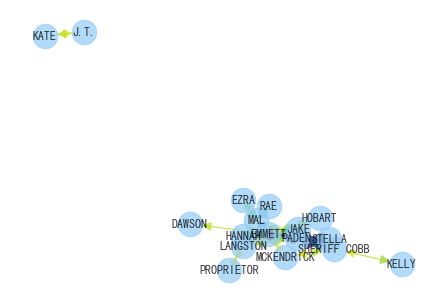

In [121]:
pos = nx.spring_layout(actor_network,k=0.55,iterations=20)
edges,weights = zip(*nx.get_edge_attributes(actor_network,'weight').items())
weights = np.array(weights)
#weights = weights*weights
weights = 6*weights/np.max(weights)
edge_colors=20*(weights/np.max(weights))
edge_colors = edge_colors.astype(int)

nx.draw(actor_network, with_labels=True, width=weights, 
        font_weight='bold', edge_color=255-edge_colors, 
        node_color='#99cef7',node_size=600, alpha=0.75, arrowsize=20)

#### Some available metrics

In [113]:
nx.to_numpy_matrix(actor_network)

matrix([[ 0., 42.,  0.,  7.,  7.,  0., 17., 13.,  6., 19.,  0.,  0.,  0.,
          0.,  0.,  0.,  5.],
        [42.,  0., 36.,  0.,  7.,  0.,  6., 19.,  0., 10.,  0.,  0.,  0.,
         35.,  0.,  0.,  0.],
        [ 0., 36.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          5.,  6.,  0.,  5.],
        [ 7.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [ 7.,  7.,  0.,  0.,  0.,  5.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [17.,  6.,  0.,  0.,  6.,  0.,  0.,  0.,  0.,  0., 11.,  0.,  0.,
          0.,  0., 17.,  0.],
        [13., 19.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [ 6.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [19., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 

In [139]:
nx.degree_centrality(actor_network)
#  directed graph does not have centrality

{'EMMETT': 1.0,
 'PADEN': 0.875,
 'SHERIFF COBB': 0.5,
 'HOBART': 0.125,
 'LANGSTON': 0.5,
 'PROPRIETOR': 0.125,
 'MAL': 0.625,
 'JAKE': 0.25,
 'DAWSON': 0.125,
 'HANNAH': 0.25,
 'EZRA': 0.125,
 'KATE': 0.125,
 'J.T.': 0.125,
 'STELLA': 0.25,
 'KELLY': 0.125,
 'RAE': 0.125,
 'MCKENDRICK': 0.25}

In [142]:
nx.betweenness_centrality(actor_network)

{'EMMETT': 0.31666666666666665,
 'PADEN': 0.2708333333333333,
 'SHERIFF COBB': 0.12083333333333333,
 'HOBART': 0.0,
 'LANGSTON': 0.10833333333333334,
 'PROPRIETOR': 0.0,
 'MAL': 0.20833333333333334,
 'JAKE': 0.0,
 'DAWSON': 0.0,
 'HANNAH': 0.0,
 'EZRA': 0.0,
 'KATE': 0.0,
 'J.T.': 0.0,
 'STELLA': 0.0,
 'KELLY': 0.0,
 'RAE': 0.0,
 'MCKENDRICK': 0.025}

In [127]:
dir(actor_network)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adj',
 '_node',
 '_pred',
 '_succ',
 'add_edge',
 'add_edges_from',
 'add_node',
 'add_nodes_from',
 'add_weighted_edges_from',
 'adj',
 'adjacency',
 'adjlist_inner_dict_factory',
 'adjlist_outer_dict_factory',
 'clear',
 'clear_edges',
 'copy',
 'degree',
 'edge_attr_dict_factory',
 'edge_subgraph',
 'edges',
 'get_edge_data',
 'graph',
 'graph_attr_dict_factory',
 'has_edge',
 'has_node',
 'has_predecessor',
 'has_successor',
 'in_degree',
 'in_edges',
 'is_directed',
 'is_multigraph',
 'name',
 'nbunch_iter',
 'neighbors',
 'node_attr_dict_factory',
 'node_di

In [134]:
nx.to_numpy_matrix(actor_network)

matrix([[ 0., 23.,  0.,  3.,  4.,  0.,  7.,  6.,  3., 10.,  0.,  0.,  0.,
          0.,  0.,  0.,  4.],
        [19.,  0., 20.,  0.,  4.,  0.,  4., 10.,  0.,  5.,  0.,  0.,  0.,
         17.,  0.,  0.,  0.],
        [ 0., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          3.,  4.,  0.,  2.],
        [ 4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [ 3.,  3.,  0.,  0.,  0.,  3.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [10.,  2.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  5.,  0.,  0.,
          0.,  0.,  7.,  0.],
        [ 7.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [ 3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [ 9.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 

In [135]:
[i for i in actor_network.neighbors('PADEN')] 

['EMMETT', 'SHERIFF COBB', 'LANGSTON', 'JAKE', 'HANNAH', 'MAL', 'STELLA']

In [137]:
actor_network.out_degree()

OutDegreeView({'EMMETT': 8, 'PADEN': 7, 'SHERIFF COBB': 4, 'HOBART': 1, 'LANGSTON': 4, 'PROPRIETOR': 1, 'MAL': 5, 'JAKE': 2, 'DAWSON': 1, 'HANNAH': 2, 'EZRA': 1, 'KATE': 1, 'J.T.': 1, 'STELLA': 2, 'KELLY': 1, 'RAE': 1, 'MCKENDRICK': 2})

In [123]:
actor_network.out_degree(weight = 'weight')

OutDegreeView({'EMMETT': 60, 'PADEN': 79, 'SHERIFF COBB': 25, 'HOBART': 4, 'LANGSTON': 12, 'PROPRIETOR': 2, 'MAL': 27, 'JAKE': 16, 'DAWSON': 3, 'HANNAH': 14, 'EZRA': 6, 'KATE': 2, 'J.T.': 3, 'STELLA': 20, 'KELLY': 2, 'RAE': 10, 'MCKENDRICK': 4})

In [124]:
actor_network.in_degree(weight = 'weight')

InDegreeView({'EMMETT': 56, 'PADEN': 76, 'SHERIFF COBB': 27, 'HOBART': 3, 'LANGSTON': 13, 'PROPRIETOR': 3, 'MAL': 30, 'JAKE': 16, 'DAWSON': 3, 'HANNAH': 15, 'EZRA': 5, 'KATE': 3, 'J.T.': 2, 'STELLA': 20, 'KELLY': 4, 'RAE': 7, 'MCKENDRICK': 6})

In [140]:
nx.density(actor_network)

0.16176470588235295

In [147]:
pd.DataFrame(actor_network.in_degree(weight = 'weight'), columns=['name', 'In degree'])

,name,In degree
0,EMMETT,56
1,PADEN,76
2,SHERIFF COBB,27
3,HOBART,3
4,LANGSTON,13
5,PROPRIETOR,3
6,MAL,30
7,JAKE,16
8,DAWSON,3
9,HANNAH,15


### Get networks for all movies

In [153]:
all_networks = {}

movie_utt_dic, movie_idx_name = get_movie_utt_dic(corpus)

for movie_idx in movie_utt_dic.keys():
    characters, characters_attrs = get_characters_from_one_movie(corpus, movie_utt_dic, movie_idx)
    actor_network = create_nodes(characters, characters_attrs, num_lines=0)
    actor_network = create_edges(corpus, movie_utt_dic[movie_idx], characters, actor_network)
    all_networks[movie_idx] = actor_network
all_networks

304713it [00:00, 668338.46it/s]
100%|███████████████████████████████████████| 617/617 [00:00<00:00, 6486.48it/s]


{'m0': <networkx.classes.digraph.DiGraph at 0x7f8a285ca100>,
 'm1': <networkx.classes.digraph.DiGraph at 0x7f8a10dcaee0>,
 'm2': <networkx.classes.digraph.DiGraph at 0x7f8a1b8391c0>,
 'm3': <networkx.classes.digraph.DiGraph at 0x7f8a1b839160>,
 'm4': <networkx.classes.digraph.DiGraph at 0x7f8a1b839100>,
 'm5': <networkx.classes.digraph.DiGraph at 0x7f89f3d74d30>,
 'm6': <networkx.classes.digraph.DiGraph at 0x7f89f3d749d0>,
 'm7': <networkx.classes.digraph.DiGraph at 0x7f89f3d74c70>,
 'm8': <networkx.classes.digraph.DiGraph at 0x7f89f3d74970>,
 'm9': <networkx.classes.digraph.DiGraph at 0x7f89f3d74910>,
 'm10': <networkx.classes.digraph.DiGraph at 0x7f89f3d742e0>,
 'm11': <networkx.classes.digraph.DiGraph at 0x7f8a107355b0>,
 'm12': <networkx.classes.digraph.DiGraph at 0x7f8a1e27ce80>,
 'm13': <networkx.classes.digraph.DiGraph at 0x7f8a0549e520>,
 'm14': <networkx.classes.digraph.DiGraph at 0x7f8a0fcb7ee0>,
 'm15': <networkx.classes.digraph.DiGraph at 0x7f8a1484d460>,
 'm16': <networkx.